In [15]:
import util_mnist_reader
import numpy as np
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import to_categorical

In [16]:
def comp_loss(yt, a2):
    m = yt.shape[1]
    final_loss = -(1/m) * (np.sum(np.multiply(yt, np.log(a2))))

    return final_loss

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [17]:
######################## Task 1 #####################################
def TASK1(xtrain,ytrain,xtest,ytest):
    xtrain = xtrain / 255
    OP_layers = 10
    q = ytrain.shape[0]
    ytrain = ytrain.reshape(1, q)

    # return one hot encoded labels to train output layers of NN model
    y_hotencoded = np.eye(OP_layers)[ytrain.astype('int32')]
    ytrain = y_hotencoded.T.reshape(OP_layers, q)

    train_data = 60000
    xtrain = xtrain.T
    middle_layers = 60
    number_epochs = 100
    node_count = xtrain.shape[0]
    lr = 1

    # Calculate the weights and biases
    weight1 = np.random.randn(middle_layers, node_count)
    bias1 = np.zeros((middle_layers, 1))
    weight2 = np.random.randn(OP_layers, middle_layers)
    bias2 = np.zeros((OP_layers, 1))

    XTr = xtrain
    YTr = ytrain
    losstraining = []

    # Perform training on training data
    for i in range(number_epochs):

        #Feed Forward propagation
        zin = np.matmul(weight1,XTr) + bias1
        ain = sigmoid(zin)
        zout = np.matmul(weight2,ain) + bias2
        aout = np.exp(zout) / np.sum(np.exp(zout), axis=0)

        # Loss calculation on the training dataset
        training_cost = comp_loss(YTr, aout)
        losstraining.append(training_cost)
        
        #Back propagation
        d_zout = aout-YTr
        d_wout = (1./train_data) * np.matmul(d_zout, ain.T)
        d_bout = (1./train_data) * np.sum(d_zout, axis=1, keepdims=True)

        # derivative calculation of back propagation
        der_a1 = np.matmul(weight2.T, d_zout)
        der_z1 = der_a1 * sigmoid(zin) * (1 - sigmoid(zin))
        der_w1 = (1./train_data) * np.matmul(der_z1, XTr.T)
        der_b1 = (1./train_data) * np.sum(der_z1, axis=1, keepdims=True)

        weight2 = weight2 - lr * d_wout
        bias2 = bias2 - lr * d_bout
        weight1 = weight1 - lr * der_w1
        bias1 = bias1 - lr * der_b1


    plt.plot(losstraining,label = 'TrainingLoss')
    plt.legend()
    

    ################ Calculate Prediction, accuracy based on trained model #####################

    test_examples_size = ytest.shape[0]
    xtest = xtest.T
    ytest = ytest.reshape(1, test_examples_size)
    y_new_test = np.eye(OP_layers)[ytest.astype('int32')]
    ytest = y_new_test.T.reshape(OP_layers, test_examples_size)

    z1 = np.matmul(weight1, xtest) + bias1
    a1 = sigmoid(z1)
    z2 = np.matmul(weight2, a1) + bias2
    a2 = np.exp(z2) / np.sum(np.exp(z2), axis=0)

    ytest = np.argmax(ytest, axis=0)
    predictions = np.argmax(a2,axis=0)

#     accuracy = accuracy_score(ytest,predictions)
#     print("\nAccuracy:\t",accuracy*100,"%")
#     conf_matrix = confusion_matrix(ytest,predictions)
#     print("\nConfusion matrix:\n",conf_matrix)
    
    #prediction = np.argmax(op_predict, axis=1)
    cal_accuracy = accuracy_score(ytest, predictions)
    print("\nAccuracy of Task 3:\t", cal_accuracy*100,"%")
    print("\nLoss of Task 3:\t", evaluation[0])
    confsn_matrix = confusion_matrix(ytest, predictions)
    print("Confusion Matrix for Task 3:\n", confsn_matrix)
    plt.show()
    return


In [18]:
######################## Task 2 #####################################
def TASK2(xtrain,ytrain,xtest,ytest):
    # Model building using Keras
    mod = Sequential([
    Dense(64, activation='sigmoid', input_shape=(784,)),
    Dense(64, activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(10, activation='softmax'),
    ])
    l =[]
    
    # Model compilation using Keras
    mod.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    )

    # Model training using Keras
    mod.fit(
    xtrain,
    to_categorical(ytrain),
    epochs=50,         
    batch_size=20,    
    )
    #plt.plot(history.history['loss'])
    #l.append(history.history['loss'])
    
    
    # Model evaluation using Keras
    evaluation = mod.evaluate(
    xtest,
    to_categorical(ytest)
    )
    print(evaluation)


    # Output prediction using the trained model using Keras
    op_predict = mod.predict(xtest)


    prediction = np.argmax(op_predict, axis=1)
    cal_accuracy = accuracy_score(ytest, prediction)
    print("\nAccuracy of Task 2:\t", cal_accuracy*100,"%")
    print("\nLoss of Task 2:\t", evaluation[0])
    confsn_matrix = confusion_matrix(ytest, prediction)
    print("Confusion Matrix for Task 2:\n", confsn_matrix)
    plt.plot(l)
    plt.show()
    
    return

In [19]:
######################## Task 3 #####################################
def TASK3(xtrain,ytrain,xtest,ytest):
    xtrain = xtrain.reshape(60000,28,28)
    xtest = xtest.reshape(10000,28,28)
    xtr_shape = np.expand_dims(xtrain, axis=3)
    xtst_shape = np.expand_dims(xtest, axis=3)
    #print(x.shape)
    #print(a.shape)

    filt_count = 8
    filt_size = 3
    pool_size = 2

    # Build the model.
    mod = Sequential([
    Conv2D(filt_count, filt_size, input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=pool_size),
    Flatten(),
    Dense(60,activation='sigmoid'),
    Dense(60,activation='sigmoid'),
    Dense(10, activation='softmax'),
    ])

    # Compile the model.
    mod.compile(
    'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    )

    # Train the model.
    history = mod.fit(
    xtr_shape,
    to_categorical(ytrain),
    epochs=20,
    batch_size=40,
    )
    plt.plot(history.history['loss'])


    # Model evaluation using Keras
    evaluation = mod.evaluate(
    xtst_shape,
    to_categorical(ytest)
    )
    print("Evaluation:", evaluation)


    # Output prediction using the trained model using Keras
    op_predict = mod.predict(xtst_shape)


    prediction = np.argmax(op_predict, axis=1)
    cal_accuracy = accuracy_score(ytest, prediction)
    print("\nAccuracy of Task 3:\t", cal_accuracy*100,"%")
    print("\nLoss of Task 3:\t", evaluation[0])
    confsn_matrix = confusion_matrix(ytest, prediction)
    print("Confusion Matrix for Task 3:\n", confsn_matrix)
    plt.show()
    return

In [20]:
xtrain, ytrain = util_mnist_reader.load_mnist('data/fashion', kind='train')
xtest, ytest = util_mnist_reader.load_mnist('data/fashion', kind='t10k')


Accuracy of Task 3:	 67.44 %


c:\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


NameError: name 'evaluation' is not defined

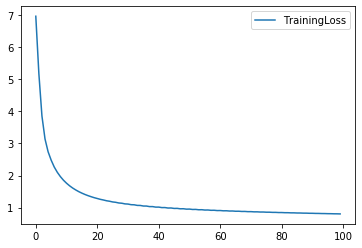

In [21]:
TASK1(xtrain,ytrain,xtest,ytest)

In [ ]:
TASK2(xtrain,ytrain,xtest,ytest)
plt.plot(l)
plt.show()

In [ ]:
TASK3(xtrain,ytrain,xtest,ytest)